# Lab 3
UIC CS 418, Spring 2023 - CC

## Academic Integrity Policy

According to the Academic Integrity Policy of this course, all work submitted for grading must be done individually, unless otherwise specified. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. 
If you have questions, please ask us on Piazza.
You must reference (including URLs) of any resources other than those linked to in the assignment, or provided by the professor or TA.

Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml._

We will run your code through MOSS software to detect copying and plagiarism.

##To submit this assignment:
1. Execute all commands and complete this notebook	
2. Download your Python Notebook (**.ipynb** file) and upload it to Gradescope
under *Lab 3 (.ipynb)*. **Make sure you check that your *.ipynb* file includes all parts of your solution (including the outputs).**
2.	Export your Notebook as a python file (**.py** file) and upload it to Gradescope under *.py file for Lab 3*. 


In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Practice: `matplotlib`

[`matplotlib`][mpl] is the most widely used plotting library available for Python. It comes with a good amount of out-of-the-box functionality and is highly customizable. Most other plotting libraries in Python provide simpler ways to generate complicated `matplotlib` plots, including `seaborn`, so it's worth learning a bit about `matplotlib` now.

You will notice how all of our notebooks have lines that look like:

	%matplotlib inline
	import matplotlib.pyplot as plt
	
The `%matplotlib inline` magic command tells `matplotlib` to render the plots
directly onto the notebook (by default it will open a new window with the plot).

Then, the `import` line lets us call `matplotlib` functions using `plt.<func>`

Here's a graph of `sin(x)` from 0 to 2 * pi.

[mpl]: http://matplotlib.org/

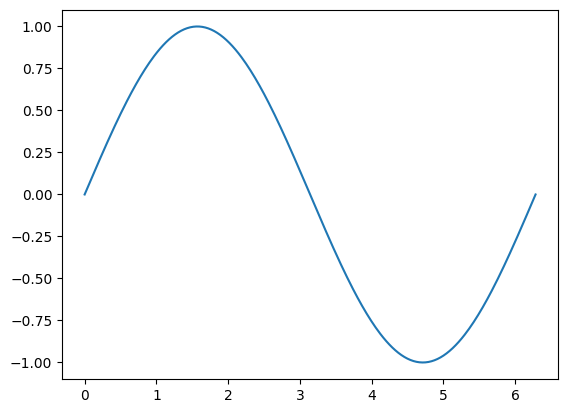

In [3]:
# Set up (x, y) pairs from 0 to 2*pi
xs = np.linspace(0, 2 * np.pi, 300)
ys = np.sin(xs)

# plt.plot takes in x-values and y-values and plots them as a line
plt.plot(xs, ys)

`matplotlib` also conveniently has the ability to plot multiple things on the same plot. Just call `plt.plot` multiple times in the same cell:

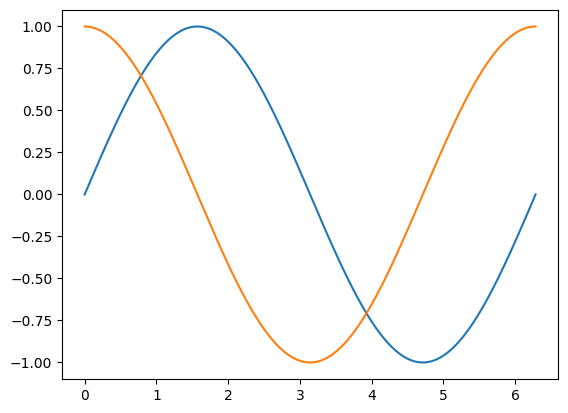

In [4]:
plt.plot(xs, ys)
plt.plot(xs, np.cos(xs))

That plot looks pretty nice but isn't presentation-ready. Luckily, `matplotlib` has a wide array of plot customizations.


## Q0:

Skim through the first part of the tutorial at https://github.com/rougier/matplotlib-tutorial to create the plot below. There is a lot of extra information there which we suggest
you read on your own time. For now, just look for what you need to make the plot.

Specifically, you'll have to change the x and y limits, add a title, and add a legend.

![](https://drive.google.com/uc?export=view&id=1pI8u8R4uBXkaNLM9gfvMUEe5hY9BydVp)

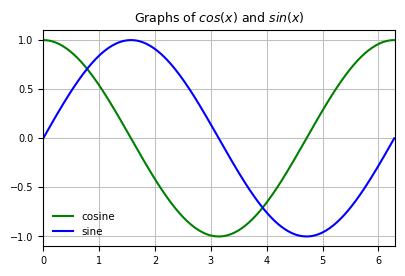

In [5]:
# Here's the starting code from last time. 
#Edit / Add code to create the plot above.
ax = plt.axes([0.5,0.5,0.55,0.45])
ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
#ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticks(np.arange(0, 7, 1))
ax.set_yticks(np.arange(-1.0, 1.5, 0.5))
ax.set_xlim(0,6.3)
ax.set_ylim(-1.1,1.1)
ax.tick_params(axis='both', which='major', labelsize=7)
ax.set_title('Graphs of $cos(x)$ and $sin(x)$', loc='center', size=9)
plt.plot(xs, np.cos(xs),color='green', label='cosine')
plt.plot(xs, ys, color='blue',label='sine')
plt.rcParams['legend.fontsize'] = 7.5
plt.legend(loc='lower left', frameon=False)

#Q1.

Load all the csv files of the divvy data into different dataframes. You will note that the column names for the first quarter are different. However, they correspond to the same thing in the other csv files. This is a common problem in datascience where small changes during data extraction can cause changes in column names.

Firstly, change the column names for the first quarter such that they match the column names as in the other quarters. Once you complete this, make a new dataframe that is a combination of all of these 4 dataframes. You may drop the trip_id, bike_id, from_station_id and to_station_id columns as they will not be needed for this lab.

You can confirm your output by adding the number of rows in each dataframe and comparing that to the dataframe you got by combining them all together.

In [6]:
#TODO 
q1 = pd.read_csv("Divvy_Trips_2018_Q1_uncleanned.csv")
q1 = q1.rename(columns={"01 - Rental Details Rental ID": "trip_id", 
                        "01 - Rental Details Local Start Time": "start_time", 
                        "01 - Rental Details Local End Time": "end_time",
                        "01 - Rental Details Bike ID": "bikeid",
                        "01 - Rental Details Duration In Seconds Uncapped": "tripduration",
                        "03 - Rental Start Station ID": "from_station_id",
                        "03 - Rental Start Station Name": "from_station_name",
                        "02 - Rental End Station ID": "to_station_id",
                        "02 - Rental End Station Name": "to_station_name",
                        "User Type": "usertype",
                        "Member Gender": "gender",
                        "05 - Member Details Member Birthday Year": "birthyear"})
q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0


In [7]:
#TODO 
q2 = pd.read_csv("Divvy_Trips_2018_Q2_uncleanned.csv")
q2.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,18000527,2018-04-01 00:04:44,2018-04-01 00:13:03,3819,499.0,22,May St & Taylor St,171,May St & Cullerton St,Subscriber,Male,1994.0
1,18000528,2018-04-01 00:06:42,2018-04-01 00:27:07,5000,"1,225.0",157,Lake Shore Dr & Wellington Ave,190,Southport Ave & Wrightwood Ave,Subscriber,Male,1965.0
2,18000529,2018-04-01 00:07:19,2018-04-01 00:23:19,5165,960.0,106,State St & Pearson St,106,State St & Pearson St,Customer,NaN,NaN
3,18000530,2018-04-01 00:07:33,2018-04-01 00:14:47,3851,434.0,241,Morgan St & Polk St,171,May St & Cullerton St,Subscriber,Male,1998.0
4,18000531,2018-04-01 00:10:23,2018-04-01 00:22:12,5065,709.0,228,Damen Ave & Melrose Ave,219,Damen Ave & Cortland St,Subscriber,Male,1983.0


In [8]:
#TODO 
q3 = pd.read_csv("Divvy_Trips_2018_Q3_uncleanned.csv")
q3.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,19244622,2018-07-01 00:00:03,2018-07-01 23:56:11,5429,"86,168.0",140,Dearborn Pkwy & Delaware Pl,106,State St & Pearson St,Customer,NaN,NaN
1,19244623,2018-07-01 00:00:13,2018-07-01 00:06:39,93,386.0,153,Southport Ave & Wellington Ave,250,Ashland Ave & Wellington Ave,Subscriber,Male,1986.0
2,19244624,2018-07-01 00:00:15,2018-07-01 00:23:26,2461,"1,391.0",76,Lake Shore Dr & Monroe St,301,Clark St & Schiller St,Subscriber,Female,1987.0
3,19244625,2018-07-01 00:00:25,2018-07-01 00:23:31,2991,"1,386.0",76,Lake Shore Dr & Monroe St,301,Clark St & Schiller St,Subscriber,Male,1986.0
4,19244626,2018-07-01 00:00:27,2018-07-01 00:11:23,2851,656.0,60,Dayton St & North Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1961.0


In [9]:
#TODO
q4 = pd.read_csv("Divvy_Trips_2018_Q4_uncleanned.csv")
q4.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,20983530,2018-10-01 00:01:17,2018-10-01 00:29:35,4551,"1,698.0",85,Michigan Ave & Oak St,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1992.0
1,20983531,2018-10-01 00:03:59,2018-10-01 00:10:55,847,416.0,13,Wilton Ave & Diversey Pkwy,144,Larrabee St & Webster Ave,Subscriber,Female,1982.0
2,20983532,2018-10-01 00:05:14,2018-10-01 00:14:08,6188,534.0,59,Wabash Ave & Roosevelt Rd,197,Michigan Ave & Madison St,Subscriber,Male,1986.0
3,20983533,2018-10-01 00:05:48,2018-10-01 00:18:46,6372,778.0,328,Ellis Ave & 58th St,419,Lake Park Ave & 53rd St,Subscriber,Female,1960.0
4,20983534,2018-10-01 00:07:29,2018-10-01 00:25:51,1927,"1,102.0",93,Sheffield Ave & Willow St,159,Claremont Ave & Hirsch St,Subscriber,Female,1993.0


In [10]:
#TODO
print(q1.shape)
print(q2.shape)
print(q3.shape)
print(q4.shape)
divvy = pd.concat([q1,q2,q3,q4], ignore_index = 'True')
divvy = divvy.drop(['trip_id','bikeid','from_station_id','to_station_id'],axis =1)
print(divvy.head())
print(divvy.shape)

(387145, 12)
(1059681, 12)
(1513570, 12)
(642686, 12)
            start_time             end_time tripduration  \
0  2018-01-01 00:12:00  2018-01-01 00:17:23        323.0   
1  2018-01-01 00:41:35  2018-01-01 00:47:52        377.0   
2  2018-01-01 00:44:46  2018-01-01 01:33:10      2,904.0   
3  2018-01-01 00:53:10  2018-01-01 01:05:37        747.0   
4  2018-01-01 00:53:37  2018-01-01 00:56:40        183.0   

             from_station_name                 to_station_name    usertype  \
0       Damen Ave & Pierce Ave       Claremont Ave & Hirsch St  Subscriber   
1  Winthrop Ave & Lawrence Ave  Clark St & Winnemac Ave (Temp)  Subscriber   
2   LaSalle St & Washington St             Troy St & North Ave  Subscriber   
3         Rush St & Hubbard St            Larrabee St & Oak St  Subscriber   
4    Blue Island Ave & 18th St            Paulina St & 18th St  Subscriber   

  gender  birthyear  
0   Male     1988.0  
1   Male     1984.0  
2   Male     1989.0  
3   Male     1983.0  
4   Ma

#Q2:
In the text cell below, identify the statistical data type of each column, i.e., Stevens' levels of measurement: Interval (Discrete), Ratio (Continuous), Nominal, Ordinal, Binary.


Examples:

*   https://www.cdc.gov/csels/dsepd/ss1978/lesson2/section2.html
*   https://www.statology.org/is-time-interval-or-ratio/




In [11]:
#TODO


Answer here: (type the statistical data types here, not in the code cell)
<br><br>start_time = Interval - Since time is infinite, it has no true 0 values.
<br>end_time = Interval - Since time is infinite, it has no true 0 values.
<br>tripduration = Ratio - Even though this is a measure of time, since there can be a true 0 value of 0 seconds, its tripduration.
<br>from_station_name = Nominal - This is the name of the station, which makes it categorical data and thus nominal.
<br>to_station_name = Nominal - This is the name of the station, which makes it categorical data and thus nominal.
<br>usertype = Binary - There are only 2 usertypes in the data, which is why this is binary.
<br>gender = Binary - There are only 2 genders in the data, which is why this is binary.
<br>birthyear = Interval - Since years are infinite, there is no true 0 value.

#Q3:
Take the new dataframe and see what is the data type that python gave to the columns start_time and end_time.
Convert that to the datetime format

In [12]:
#TODO
print("Before:\n")
print(divvy.dtypes)
divvy['start_time']=pd.to_datetime(divvy['start_time'])
divvy['end_time']=pd.to_datetime(divvy['end_time'])
print('\n\nAfter:\n')
print(divvy.dtypes)

Before:

start_time            object
end_time              object
tripduration          object
from_station_name     object
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object


After:

start_time           datetime64[ns]
end_time             datetime64[ns]
tripduration                 object
from_station_name            object
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
dtype: object


#Q4:
Compute the following measures for each column in the data set. 


1.   Measures of Central Tendency: Mean, Median, Mode
2.   Measures of Dispersion: Standard Deviation, Variance, Interquartile Range (IQR), Skewness, Variation Ratio

Hint 1: Find the measure that's best suited for the statistical data type. 

Hint 2: If you are getting any errors, read the error carefully, and perform any transformations needed. Are you getting an error because the measure cannot be computed for this data type? Is it because the column has unexpected values? 

Examples: 
*   http://desart.us/courses/3000/ctanddisp.html
*   https://peterstatistics.com/CrashCourse/2-SingleVar/Nominal/Nominal-1c-Center-Dispersion.html


In [13]:
divvy['tripduration']=divvy['tripduration'].str.replace(',','')
divvy['tripduration']=pd.to_numeric(divvy['tripduration'])
divvy['start_epoch'] = [x.timestamp() for x in divvy['start_time']]
divvy['end_epoch'] = [x.timestamp() for x in divvy['end_time']]

In [14]:
#TODO

print('tripduration:\n')
print('Mean: ',divvy['tripduration'].mean())
print('Median: ', divvy['tripduration'].median())
print('Mode: ', divvy['tripduration'].mode()[0])
print('Standard deviation: ', divvy['tripduration'].std())
print('Variance: ', divvy['tripduration'].var())
IQR=(np.quantile(divvy['tripduration'],0.75)-np.quantile(divvy['tripduration'],0.25))
print('Interquartile Range: ', IQR)
print('Skewness: ', divvy['tripduration'].skew())
mode_freq=divvy[divvy['tripduration']==divvy['tripduration'].mode()[0]].shape[0]
print('Variation Ratio: ', (1-(mode_freq/divvy.shape[0])))


print('\n\nstart_time:\n')
#print('Mean: ', divvy['start_epoch'].mean())
print('Median: ', divvy['start_epoch'].median())
print('Mode: ', divvy['start_epoch'].mode()[0])
#print('Standard deviation: ', divvy['start_epoch'].std())
#print('Variance: ', divvy['start_epoch'].var())
IQR_start_time=(np.quantile(divvy['start_epoch'],0.75)-np.quantile(divvy['start_epoch'],0.25))
print('Interquartile Range: ', IQR_start_time)
print('Skewness: ', divvy['start_epoch'].skew())
mode_freq_start=divvy[divvy['start_epoch']==divvy['start_epoch'].mode()[0]].shape[0]
print('Variation Ratio: ', (1-(mode_freq_start/divvy.shape[0])))



print('\n\nend_time:\n')
#print('Mean: ', divvy['end_epoch'].mean())
print('Median: ', divvy['end_epoch'].median())
print('Mode: ', divvy['end_epoch'].mode()[0])
#print('Standard deviation: ', divvy['end_epoch'].std())
#print('Variance: ', divvy['end_epoch'].var())
IQR_end_time=(np.quantile(divvy['end_epoch'],0.75)-np.quantile(divvy['end_epoch'],0.25))
print('Interquartile Range: ', IQR_end_time)
mode_freq_end=divvy[divvy['end_epoch']==divvy['end_epoch'].mode()[0]].shape[0]
print('Skewness: ', divvy['end_epoch'].skew())
print('Variation Ratio: ', (1-(mode_freq_end/divvy.shape[0])))


print('\n\nbirthyear:\n')
print('Mean: ', divvy['birthyear'].mean())
print('Median: ', divvy['birthyear'].median())
print('Mode: ', divvy['birthyear'].mode()[0])
print('Standard deviation: ', divvy['birthyear'].std())
print('Variance: ', divvy['birthyear'].var())
#print(np.nanpercentile(divvy['birthyear'],75,axis=0))
#print(np.nanpercentile(divvy['birthyear'],25,axis=0))
IQR_birthyear=(np.nanpercentile(divvy['birthyear'],75,axis=0)-np.nanpercentile(divvy['birthyear'],25,axis=0))
print('Interquartile Range: ', IQR_birthyear)
mode_freq_birth=divvy[divvy['birthyear']==divvy['birthyear'].mode()[0]].shape[0]
print('Skewness: ', divvy['birthyear'].skew())
print('Variation Ratio: ', (1-(mode_freq_birth/divvy.shape[0])))




print('\n\nfrom_station_name:\n')
print('Mode: ',divvy['from_station_name'].mode()[0])
mode_freq_from=divvy[divvy['from_station_name']==divvy['from_station_name'].mode()[0]].shape[0]
print('Variation Ratio: ', (1-(mode_freq_from/divvy.shape[0])))


print('\n\nto_station_name:\n')
print('Mode: ',divvy['to_station_name'].mode()[0])
mode_freq_to=divvy[divvy['to_station_name']==divvy['to_station_name'].mode()[0]].shape[0]
print('Variation Ratio: ', (1-(mode_freq_to/divvy.shape[0])))


print('\n\ngender:\n')
print('Mode: ',divvy['gender'].mode()[0])
mode_freq_gender=divvy[divvy['gender']==divvy['gender'].mode()[0]].shape[0]
print('Variation Ratio: ', (1-(mode_freq_gender/divvy.shape[0])))

print('\n\nusertype:\n')
print('Mode: ',divvy['usertype'].mode()[0])
mode_freq_gender=divvy[divvy['usertype']==divvy['usertype'].mode()[0]].shape[0]
print('Variation Ratio: ', (1-(mode_freq_gender/divvy.shape[0])))

tripduration:

Mean:  1413.168251236025
Median:  673.0
Mode:  389.0
Standard deviation:  35947.22902607204
Variance:  1292203274.6528761
Interquartile Range:  815.0
Skewness:  215.6724303395487
Variation Ratio:  0.9988706890378848


start_time:

Median:  1532194065.0
Mode:  1531244027.0
Interquartile Range:  9503208.25
Skewness:  -0.2534116182431041
Variation Ratio:  0.9999972245982744


end_time:

Median:  1532196136.5
Mode:  1544689918.0
Interquartile Range:  9502502.0
Skewness:  -0.2535371645361499
Variation Ratio:  0.9999952818170667


birthyear:

Mean:  1982.690975969143
Median:  1986.0
Mode:  1989.0
Standard deviation:  10.930349631349326
Variance:  119.47254306353835
Interquartile Range:  14.0
Skewness:  -1.1305018421946305
Variation Ratio:  0.9502692417213929


from_station_name:

Mode:  Streeter Dr & Grand Ave
Variation Ratio:  0.9814203506886604


to_station_name:

Mode:  Streeter Dr & Grand Ave
Variation Ratio:  0.9782905301627884


gender:

Mode:  Male
Variation Ratio:  0.3

###Describe in this text cell any problems that you faced and how you selected the measures per each column.


Answer here:
1) tripduration had commas, which I had to clean up and remove to convert to numeric so that I could calculate the mean, median, standard deviation, etc. We calculate the mean trip duration, the standard deviation and variance which tell us the distribution of the data around the mean. We also calculate the median and mode, which together with the mean can give us an insight into the  shape of the data, and how it is skewed. This is backed up by the skewness that we calculate. Interquartile range gives us the middle half of the dataset, which we can use to prune outliers later.
<br><br>
2) for start_time and end_time, we need to convert the data from a datetime format to a numeric format, so that we can perform the calculations for measures such as Variance and Skewness. While the other fields can still be calculated on the datatype datetime, these two cannot. To work around this, I converted the datetime to epochs, which can be treated as simple numbers. (Epochs are the number of seconds that have passed since January 1, 1970 00:00:00, aka UNIX time). We calculate the median, mode, interquartile range, skewness and Variation Ratio for start and end times, which tell us the median time when rides were started and ended, the most common times to start and end a ride, along with how common that time is in the dataset, and what the middle half of the dataset looks like, along with the shape of the distribution of these times.
<br><br>
3) For birthyear, we calculated the mean birthyear of the users, the median value and the mode, which together with skewness tell us the shape of the distribution curve. Skewness also points us towards the direction of the outliers, and variation ratio tells us how many users are not in the most common age group, i.e. the mode. The interquartile range tells us the range of age for the middle 50% of our userbase for Divvy in 2018. Lastly, the standard distribution and variance tell us the distribution of the data around the mean.
<br><br>
4) For from_station_name and to_station_name, mode makes the most sense because mean and median can be applied to numeric data only. We can also calculate the Variation Ratio for these columns, since that relies on the mode. The mode would tell us which stations are used the most, and the variation ratio would tell us how common that station is in our dataset.
<br><br>
5) Similarly, for gender, since the data is non numeric, we can only calculate the mode and variation ratio. Mode tell us which gender uses the service the most, and the variation ratio would tell us how the data is split between Male and Female.
<br><br>
6) For usertype, we use mode and variation ratio again since the value is not numerical, and this tells us the most common user type, along with the variation ratio which tells us how many rides were made by users that are in the mode. 

#Q5:
Convert the column birthyear to the current age.

In [15]:
#TODO
from datetime import datetime
currentyear = float(datetime.now().year)
divvy['age']=[currentyear-x for x in divvy['birthyear']]
divvy.head()

,start_time,end_time,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,start_epoch,end_epoch,age
0,2018-01-01 00:12:00,2018-01-01 00:17:23,323.0,Damen Ave & Pierce Ave,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,1.514766e+09,1.514766e+09,35.0
1,2018-01-01 00:41:35,2018-01-01 00:47:52,377.0,Winthrop Ave & Lawrence Ave,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,1.514767e+09,1.514768e+09,39.0
2,2018-01-01 00:44:46,2018-01-01 01:33:10,2904.0,LaSalle St & Washington St,Troy St & North Ave,Subscriber,Male,1989.0,1.514767e+09,1.514770e+09,34.0
3,2018-01-01 00:53:10,2018-01-01 01:05:37,747.0,Rush St & Hubbard St,Larrabee St & Oak St,Subscriber,Male,1983.0,1.514768e+09,1.514769e+09,40.0
4,2018-01-01 00:53:37,2018-01-01 00:56:40,183.0,Blue Island Ave & 18th St,Paulina St & 18th St,Subscriber,Male,1989.0,1.514768e+09,1.514768e+09,34.0


#Q6.1:
Perform data cleaning: for example, identify and decide what to do with any outliers, any invalid birthyears (e.g., greater than 2023), any end time that is earlier than the start time, identify and decide what to do with any NaN or empty values etc.

*Hint: use boxplots to identify outliers in quantitative columns.*

Explain your decisions

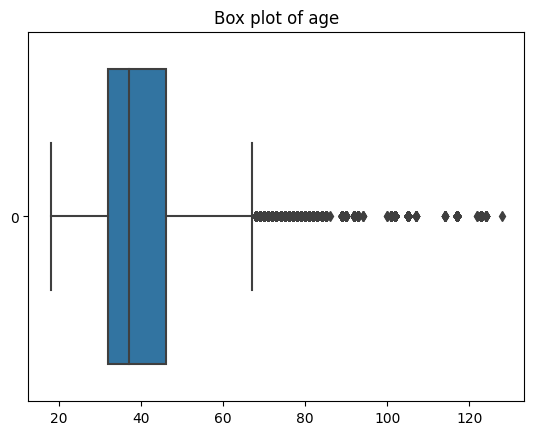

In [16]:
#TODO
plt.figure()
plt.title('Box plot of age')
sns.boxplot(data=divvy['age'], orient='h')
plt.show()

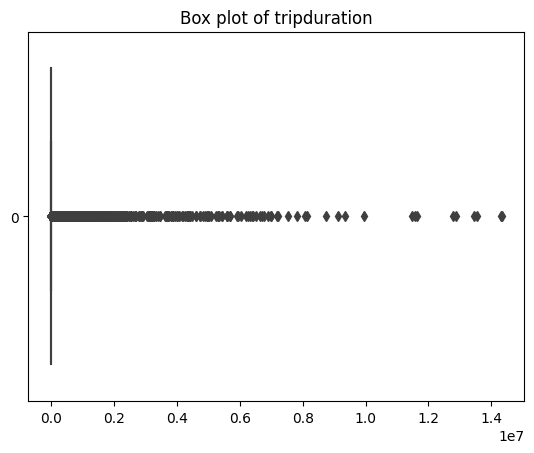

In [17]:
plt.figure()
plt.title('Box plot of tripduration')
sns.boxplot(data=divvy['tripduration'], orient='h')
plt.show()

In [18]:
print('Shape Before:', divvy.shape)
divvy['usertype'].fillna(divvy['usertype'].mode()[0], inplace = True)
divvy['gender'].fillna(divvy['gender'].mode()[0], inplace = True)
divvy['birthyear'].fillna(divvy['birthyear'].mean(), inplace = True)
divvy['age'].fillna(currentyear-divvy['birthyear'], inplace = True)
divvy['tripduration'].fillna(divvy['end_time']-divvy['start_time'], inplace = True)
divvy = divvy.dropna()
print('Shape After removing empty values:', divvy.shape)

divvy = divvy[(divvy['birthyear']<=2018) & (divvy['birthyear']>=(np.nanpercentile(divvy['birthyear'],25,axis=0)-1.5*IQR_birthyear))]
print('Shape After pruning birthyear:', divvy.shape)

divvy = divvy[(divvy['end_time']>divvy['start_time'])]
print('Shape After checking start_time < end_time:', divvy.shape)

divvy = divvy[(divvy['tripduration']>0)]
divvy=divvy[(divvy['tripduration']<=(np.quantile(divvy['tripduration'],0.75)+1.5*IQR))]
print('Shape After pruning trip duration:', divvy.shape)

Shape Before: (3603082, 11)
Shape After removing empty values: (3603082, 11)
Shape After pruning birthyear: (3489772, 11)
Shape After checking start_time < end_time: (3489765, 11)
Shape After pruning trip duration: (3227578, 11)


To perform our cleaning, after we handle the empty values, we first remove all records that have birthyear greater than 2018, since the data is from 2018 onwards. Ideally this isn't really possible either since an individual born in 2018 wouldn't really be able to ride a bike, but we give them the benefit of doubt.
Then, we use the age column to calculate it's interquartile range, and keep only those values that are greater than `(Q1 - 1.5 * IQR)`, since people are not very likely to be born in the 1900s and still be riding bikes today.
Then, we ensure that all start times preceed end times and that the trip duration is greater than 0 and less than `(Q3 + 1.5 * IQR)`. The method of using the interquartile range to calculate the maxiumum and minimum range for outliers is a standard industry practice which we have used here. We do not prune the outliers in the lower range, because the value for `(Q1 - 1.5 * IQR)` of tripduration would be negative, which would indicate that there are no outliers there. Instead, we just ensure that the tripduration is greater than 0.

###Explain in this text cell how did you handle NaNs and empty values and why


Answer here: We fill in the empty gender and usertype with the modes, birthyear with mean, age recalculated with the new birthyear and tripduration as the difference between the start time and end time, and then remove all the other rows with empty columns. While we can safely estimate the above columns, it would not be prudent to fill other columns such as start_time, end_time, from_station_name and to_station_name with some value.

#Q6.2:

Compute the central tendency and dispersion again (copy/paste the code from Q4)

In [19]:
#TODO

print('tripduration:\n')
print('Mean: ',divvy['tripduration'].mean())
print('Median: ', divvy['tripduration'].median())
print('Mode: ', divvy['tripduration'].mode()[0])
print('Standard deviation: ', divvy['tripduration'].std())
print('Variance: ', divvy['tripduration'].var())
IQR=(np.quantile(divvy['tripduration'],0.75)-np.quantile(divvy['tripduration'],0.25))
print('Interquartile Range: ', IQR)
print('Skewness: ', divvy['tripduration'].skew())
mode_freq=divvy[divvy['tripduration']==divvy['tripduration'].mode()[0]].shape[0]
print('Variation Ratio: ', (1-(mode_freq/divvy.shape[0])))


print('\n\nstart_time:\n')
#print('Mean: ', divvy['start_epoch'].mean())
print('Median: ', divvy['start_epoch'].median())
print('Mode: ', divvy['start_epoch'].mode()[0])
#print('Standard deviation: ', divvy['start_epoch'].std())
#print('Variance: ', divvy['start_epoch'].var())
IQR_start_time=(np.quantile(divvy['start_epoch'],0.75)-np.quantile(divvy['start_epoch'],0.25))
print('Interquartile Range: ', IQR_start_time)
print('Skewness: ', divvy['start_epoch'].skew())
mode_freq_start=divvy[divvy['start_epoch']==divvy['start_epoch'].mode()[0]].shape[0]
print('Variation Ratio: ', (1-(mode_freq_start/divvy.shape[0])))



print('\n\nend_time:\n')
#print('Mean: ', divvy['end_epoch'].mean())
print('Median: ', divvy['end_epoch'].median())
print('Mode: ', divvy['end_epoch'].mode()[0])
#print('Standard deviation: ', divvy['end_epoch'].std())
#print('Variance: ', divvy['end_epoch'].var())
IQR_end_time=(np.quantile(divvy['end_epoch'],0.75)-np.quantile(divvy['end_epoch'],0.25))
print('Interquartile Range: ', IQR_end_time)
mode_freq_end=divvy[divvy['end_epoch']==divvy['end_epoch'].mode()[0]].shape[0]
print('Skewness: ', divvy['end_epoch'].skew())
print('Variation Ratio: ', (1-(mode_freq_end/divvy.shape[0])))


print('\n\nbirthyear:\n')
print('Mean: ', divvy['birthyear'].mean())
print('Median: ', divvy['birthyear'].median())
print('Mode: ', divvy['birthyear'].mode()[0])
print('Standard deviation: ', divvy['birthyear'].std())
print('Variance: ', divvy['birthyear'].var())
#print(np.nanpercentile(divvy['birthyear'],75,axis=0))
#print(np.nanpercentile(divvy['birthyear'],25,axis=0))
IQR_birthyear=(np.nanpercentile(divvy['birthyear'],75,axis=0)-np.nanpercentile(divvy['birthyear'],25,axis=0))
print('Interquartile Range: ', IQR_birthyear)
mode_freq_birth=divvy[divvy['birthyear']==divvy['birthyear'].mode()[0]].shape[0]
print('Skewness: ', divvy['birthyear'].skew())
print('Variation Ratio: ', (1-(mode_freq_birth/divvy.shape[0])))




print('\n\nfrom_station_name:\n')
print('Mode: ',divvy['from_station_name'].mode()[0])
mode_freq_from=divvy[divvy['from_station_name']==divvy['from_station_name'].mode()[0]].shape[0]
print('Variation Ratio: ', (1-(mode_freq_from/divvy.shape[0])))


print('\n\nto_station_name:\n')
print('Mode: ',divvy['to_station_name'].mode()[0])
mode_freq_to=divvy[divvy['to_station_name']==divvy['to_station_name'].mode()[0]].shape[0]
print('Variation Ratio: ', (1-(mode_freq_to/divvy.shape[0])))


print('\n\ngender:\n')
print('Mode: ',divvy['gender'].mode()[0])
mode_freq_gender=divvy[divvy['gender']==divvy['gender'].mode()[0]].shape[0]
print('Variation Ratio: ', (1-(mode_freq_gender/divvy.shape[0])))

print('\n\nusertype:\n')
print('Mode: ',divvy['usertype'].mode()[0])
mode_freq_gender=divvy[divvy['usertype']==divvy['usertype'].mode()[0]].shape[0]
print('Variation Ratio: ', (1-(mode_freq_gender/divvy.shape[0])))

tripduration:

Mean:  774.0926161970369
Median:  626.0
Mode:  389.0
Standard deviation:  514.955250393807
Variance:  265178.9099081484
Interquartile Range:  673.0
Skewness:  1.0646714035664233
Variation Ratio:  0.9987870161464727


start_time:

Median:  1532238582.0
Mode:  1531244027.0
Interquartile Range:  9739737.75
Skewness:  -0.25540813933397183
Variation Ratio:  0.9999969017015236


end_time:

Median:  1532239353.0
Mode:  1531059342.0
Interquartile Range:  9739660.0
Skewness:  -0.2554504352500134
Variation Ratio:  0.9999975213612189


birthyear:

Mean:  1983.662536116594
Median:  1985.0
Mode:  1982.690975969143
Standard deviation:  8.865836183458567
Variance:  78.60305123192317
Interquartile Range:  10.0
Skewness:  -0.8900438320368711
Variation Ratio:  0.8856405639151091


from_station_name:

Mode:  Canal St & Adams St
Variation Ratio:  0.9818365350117023


to_station_name:

Mode:  Canal St & Adams St
Variation Ratio:  0.9827418578265188


gender:

Mode:  Male
Variation Ratio:  0.

### Did any meassure change after cleanning?

Answer here:

We see all of our measures have changed, some to a greater degree and others to a lesser degree.

## Q7:
Explore the newly created combined dataframe to answer the following questions.


What time range is represented here?
What was the maximum usage on a SINGLE DAY and what date/dates were those (Hint: You will need to group all trips taken in a day and then count them)

Write code in the cell below to perform your exploration.

In [20]:
#TODO 
divvy['start_day'] = [pd.to_datetime(x.date()) for x in divvy['start_time']]
divvy.head()

,start_time,end_time,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,start_epoch,end_epoch,age,start_day
0,2018-01-01 00:12:00,2018-01-01 00:17:23,323.0,Damen Ave & Pierce Ave,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,1.514766e+09,1.514766e+09,35.0,2018-01-01
1,2018-01-01 00:41:35,2018-01-01 00:47:52,377.0,Winthrop Ave & Lawrence Ave,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,1.514767e+09,1.514768e+09,39.0,2018-01-01
3,2018-01-01 00:53:10,2018-01-01 01:05:37,747.0,Rush St & Hubbard St,Larrabee St & Oak St,Subscriber,Male,1983.0,1.514768e+09,1.514769e+09,40.0,2018-01-01
4,2018-01-01 00:53:37,2018-01-01 00:56:40,183.0,Blue Island Ave & 18th St,Paulina St & 18th St,Subscriber,Male,1989.0,1.514768e+09,1.514768e+09,34.0,2018-01-01
5,2018-01-01 00:56:15,2018-01-01 01:00:41,266.0,Broadway & Waveland Ave,Halsted St & Roscoe St,Subscriber,Female,1994.0,1.514768e+09,1.514768e+09,29.0,2018-01-01


In [21]:
print('Start: ', divvy['start_time'].min(), 'End: ', divvy['end_time'].max())
print('Range of the file: ', divvy['end_time'].max()-divvy['start_time'].min())

Start:  2018-01-01 00:12:00 End:  2019-01-01 00:20:43
Range of the file:  365 days 00:08:43


In [22]:
import matplotlib.dates as mdates

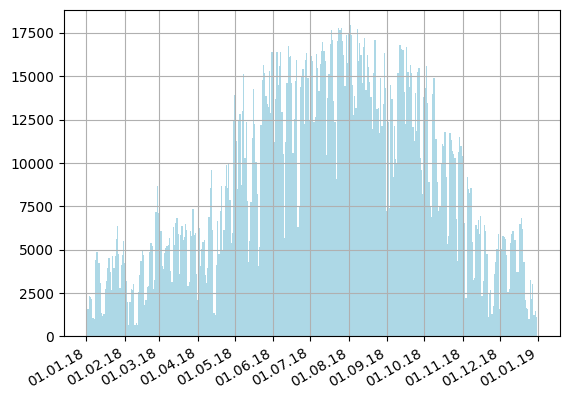

Date of Max usage:  02-08-2018
Number of rides on that day:  17930.0


In [23]:
fig, ax = plt.subplots(1,1)
y, x, _ = ax.hist(divvy['start_day'], bins=365, color='lightblue')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.gcf().autofmt_xdate()
plt.grid()
plt.show()

print('Date of Max usage: ',datetime.strptime('2018' + "-" + str(y.argmax()+1), "%Y-%j").strftime("%d-%m-%Y"))#argmax is 0-indexed
print('Number of rides on that day: ',y.max())

Type your answer (count and date) here

17930 on 2nd August 2018

The range of the file is 365 days 00:08:43

## Submission

You're almost done! 

After executing all commands and completing this notebook:
2. Download your Python Notebook (**.ipynb** file) and upload it to Gradescope
under *Lab 3 (.ipynb)*. **Make sure you check that your *.ipynb* file includes all parts of your solution (including the outputs).**
2.	Export your Notebook as a python file (**.py** file) and upload it to Gradescope under *.py file for Lab 3*. 